In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from termcolor import colored as cl # text customization

from sklearn.preprocessing import StandardScaler # data normalization       
from sklearn.cluster import KMeans # K-means algorithm
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('C:\\Users\\Minh Chi\\Downloads\\boDuLieu\\lab 9\\Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df['Gender'] = df['Genre'].map({'Male' : 1, 'Female' : 0})
df



,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Gender
0,1,Male,19,15,39,1.0
1,2,Male,21,15,81,1.0
2,3,Female,20,16,6,NaN
3,4,Female,23,16,77,NaN
4,5,Female,31,17,40,NaN
...,...,...,...,...,...,...
195,196,Female,35,120,79,NaN
196,197,Female,45,126,28,NaN
197,198,Male,32,126,74,1.0
198,199,Male,32,137,18,1.0


In [13]:
df.set_index('CustomerID', inplace=True)

KeyError: "None of ['CustomerID'] are in the columns"

In [20]:
data = df.drop('Genre', axis= 1)
data


,Age,Annual Income (k$),Spending Score (1-100),Gender
CustomerID,,,,
1,19,15,39,1
2,21,15,81,1
3,20,16,6,0
4,23,16,77,0
5,31,17,40,0
...,...,...,...,...
196,35,120,79,0
197,45,126,28,0
198,32,126,74,1


In [ ]:
data.head(10)
data.describe(include= np.number)

,Age,Annual Income (k$),Spending Score (1-100),Gender
count,200.000000,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000,0.440000
std,13.969007,26.264721,25.823522,0.497633
min,18.000000,15.000000,1.000000,0.000000
25%,28.750000,41.500000,34.750000,0.000000
50%,36.000000,61.500000,50.000000,0.000000
75%,49.000000,78.000000,73.000000,1.000000
max,70.000000,137.000000,99.000000,1.000000


In [ ]:
Q1 =data['Age'].quantile(.25)
Q2 = data['Age'].quantile(.50)
Q3 = data['Age'].quantile(.75)
print(Q1, Q2, Q3)
IQRange = Q3 - Q1
print(IQRange)
lower_bound = Q1 - 1.5*IQRange
upper_bound = Q3 + 1.5*IQRange
print(lower_bound, upper_bound)

28.75 36.0 49.0
20.25
-1.625 79.375


C:\Users\Minh Chi\AppData\Local\Temp\ipykernel_3420\2250256921.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)']],


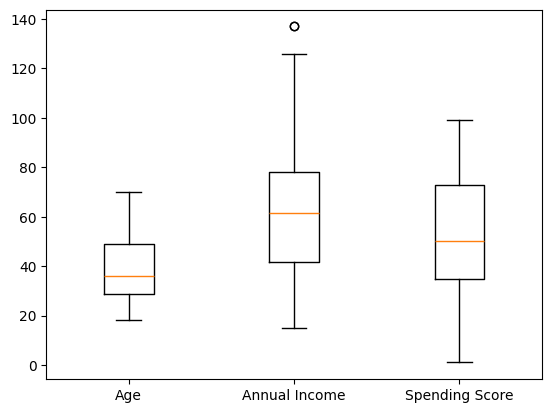

In [ ]:
# biểu diễn sự phân bố của 3 trường Age, annual income và spending score
plt.boxplot([data['Age'], data['Annual Income (k$)'], data['Spending Score (1-100)']],
            labels = ['Age', 'Annual Income', 'Spending Score'])

plt.show()


In [ ]:
Q1 = data['Annual Income (k$)'].quantile(.25)
Q2 = data['Annual Income (k$)'].quantile(.50)
Q3 = data['Annual Income (k$)'].quantile(.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.3*IQR



41.5 61.5 78.0
36.5


In [ ]:
# ourline_high = df[df['Annual Income (k$)'] > upper_bound]
# # Hiển thị thông tin
# print(f"Số khách outlier (thu nhập > {upper_bound:.2f}k$):", len(ourline_high))
# print(ourline_high)

Số khách outlier (thu nhập > 125.45k$): 4
             Genre  Age  Annual Income (k$)  Spending Score (1-100)  Gender
CustomerID                                                                 
197         Female   45                 126                      28       0
198           Male   32                 126                      74       1
199           Male   32                 137                      18       1
200           Male   30                 137                      83       1


In [ ]:
# Loại bỏ ourlier
# Lọc chỉ giữ các điểm trong khoảng
df_clean = data[
    (data['Annual Income (k$)'] >= lower_bound) &
    (data['Annual Income (k$)'] <= upper_bound)
].copy()  

# print(f"Removed {len(df) - len(df_clean)} outliers from Annual Income")

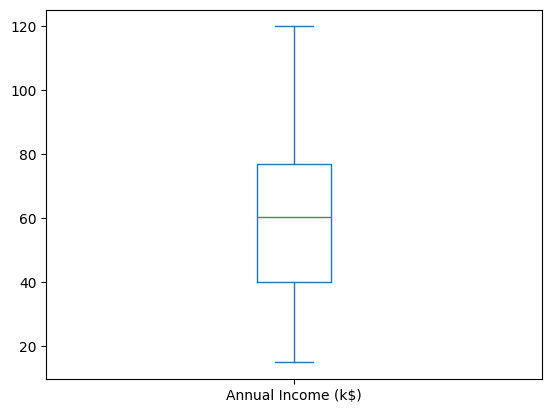

In [ ]:
#  kiểm tra sau khi loại bỏ ourlier
df_clean['Annual Income (k$)'].plot(kind='box')
plt.show()

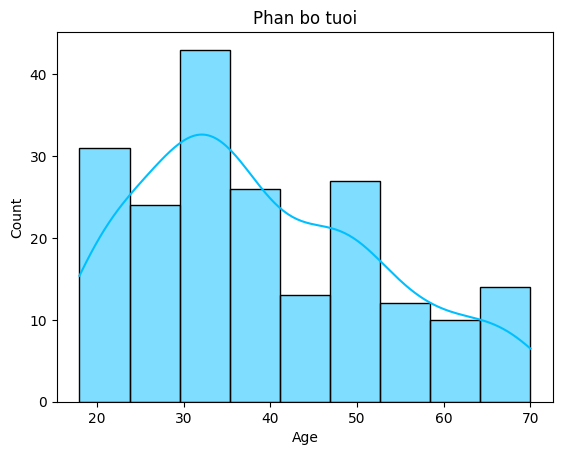

In [ ]:
# xem sự phân bố tuổi
sb.histplot(data['Age'], kde=True, color='deepskyblue')
plt.title('Phan bo tuoi')
plt.show()

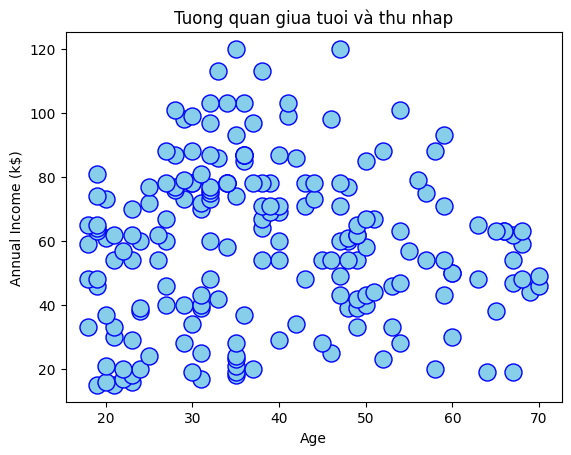

In [ ]:
#trực quang trường tuổi với mức thu nhập

df_clean.plot(kind='scatter', x = 'Age', y = 'Annual Income (k$)', color = 'skyblue', s = 150, edgecolor = 'b')
plt.title('Tuong quan giua tuoi và thu nhap')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

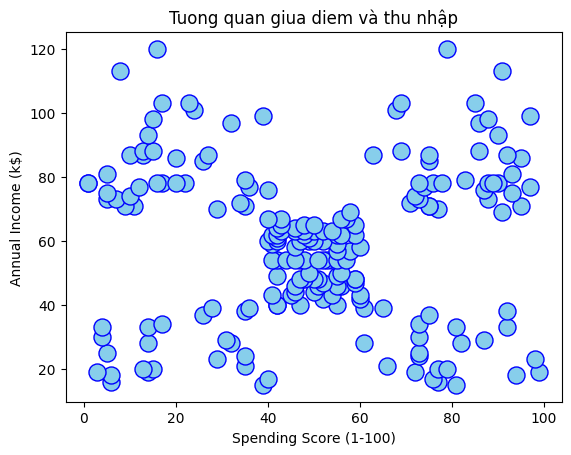

In [ ]:
#trực quang trường mức thu nhập  với mức chi tiêu 
df_clean.plot(kind='scatter', x = 'Spending Score (1-100)', y = 'Annual Income (k$)', color = 'skyblue', s = 150, edgecolor = 'b')
plt.title('Tuong quan giua diem và thu nhập')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

    k     inertia  silhouette
0   2  382.155300    0.332551
1   3  289.599440    0.356392
2   4  200.399220    0.407664
3   5  161.030251    0.424450
4   6  124.640355    0.438322
5   7  108.427549    0.424989
6   8   95.396824    0.416968
7   9   83.747938    0.428167
8  10   77.065375    0.391318


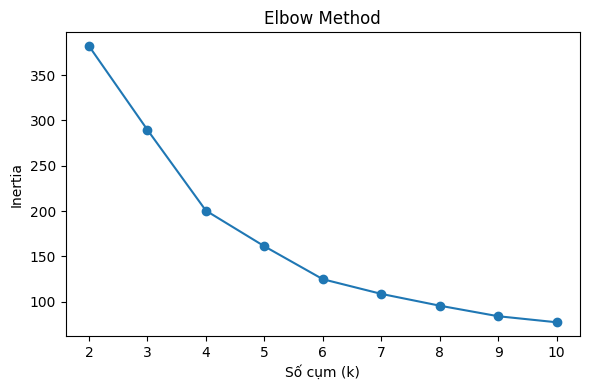

In [ ]:

# 1. Chuẩn hoá dữ liệu cho hai đặc trưng Income & Score
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df_clean[features].values
# X = df_clean.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Tính Inertia và Silhouette cho k từ 2 đến 10
results = []
for k in range(2, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    labels = km.fit_predict(X_scaled)
    results.append({
        'k': k,
        'inertia': km.inertia_,
        'silhouette': silhouette_score(X_scaled, labels)
    })

df_metrics = pd.DataFrame(results)
print(df_metrics)

# 3. Vẽ Elbow plot
plt.figure(figsize=(6,4))
plt.plot(df_metrics['k'], df_metrics['inertia'], 'o-')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.tight_layout()
plt.show()

# # 4. Vẽ Silhouette Score plot
# plt.figure(figsize=(6,4))
# plt.plot(df_metrics['k'], df_metrics['silhouette'], 'o-')
# plt.xlabel('Số cụm (k)')
# plt.ylabel('Silhouette Score')
# plt.title('Silhouette Analysis')
# plt.tight_layout()
# plt.show()


In [ ]:
#tiến hàng phân cụm với k = 6
cluster = 6
model =  KMeans(init='k-means++',
                n_clusters=cluster,
                n_init=12)
model.fit(X)
labels = model.labels_
print(cl(labels[:100], attrs=['bold']))

[0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0 5 0
 5 0 5 2 5 2 1 0 5 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1]


In [94]:
df_clean['cluster_num'] = labels
df_clean.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender,cluster_num
CustomerID,,,,,
1,19,15,39,1,0
2,21,15,81,1,5
3,20,16,6,0,0
4,23,16,77,0,5
5,31,17,40,0,0


In [95]:
# sử dụng phương thức 'groupby' để nhóm giá trị cụm và xem giá trị trung bình của từng thuộc tính 
#trong tập dữ liệu bằng phương pháp 'mean'
print(df_clean.groupby('cluster_num').mean())


                   Age  Annual Income (k$)  Spending Score (1-100)    Gender
cluster_num                                                                 
0            44.142857           25.142857               19.523810  0.380952
1            27.000000           56.657895               49.131579  0.342105
2            56.155556           53.377778               49.088889  0.444444
3            41.878788           85.606061               16.939394  0.575758
4            32.783784           84.108108               82.324324  0.432432
5            25.272727           25.727273               79.363636  0.409091


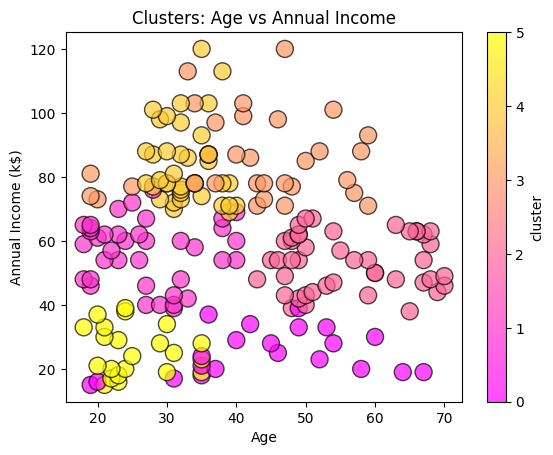

In [102]:
# 1. Age vs Annual Income
plt.scatter(
    df_clean['Age'],
    df_clean['Annual Income (k$)'],
    c=df_clean['cluster_num'],
    cmap='spring',
    s=150,
    alpha=0.7,
    edgecolor='k'
)
plt.title('Clusters: Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.colorbar(label='cluster')
# plt.tight_layout()
plt.show()

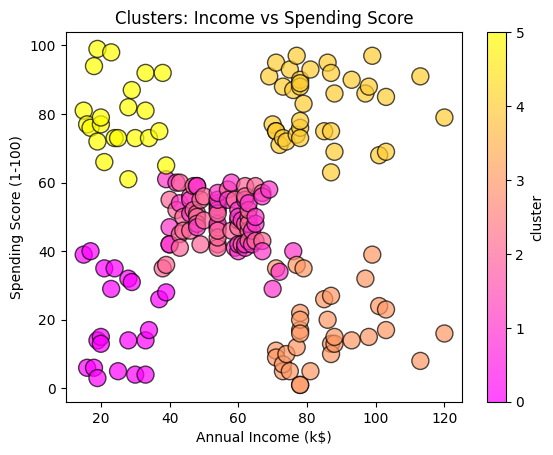

In [103]:
# 2. Annual Income vs Spending Score
# plt.figure(figsize=(6,5))
plt.scatter(
    df_clean['Annual Income (k$)'],
    df_clean['Spending Score (1-100)'],
    c=df_clean['cluster_num'],
    cmap='spring',
    s=150,
    alpha=0.7,
    edgecolor='k'
)
plt.title('Clusters: Income vs Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(label='cluster')
# plt.tight_layout()
plt.show()